In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.cluster import SilhouetteVisualizer


In [51]:
train=pd.read_csv('train.csv')

In [52]:
train.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0


In [53]:
test=pd.read_csv("test.csv")

In [54]:
test.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,114342,2,BHK,Independent Floor,Palava,1347,Semi-Furnished,1,Mumbai,0,...,0,1,1,1,0,72624,1,0,900,NaN
1,88819,1,BHK,Independent House,Somajiguda,634,Semi-Furnished,3,Hyderabad,1,...,0,0,1,1,0,19656,0,0,2500,NaN
2,85623,1,BHK,Apartment,Toli Chowki,524,Unfurnished,1,Hyderabad,1,...,1,1,0,0,0,7500,0,0,3200,NaN
3,130856,3,BHK,Apartment,Thane West,1837,Unfurnished,5,Mumbai,1,...,1,0,0,0,1,137646,1,1,1200,NaN
4,40089,2,BHK,Apartment,Krishnarajapura,1208,Semi-Furnished,2,Bangalore,1,...,0,1,1,1,0,110898,0,1,1000,NaN


## BAse Model
* Regression-Null Model

In [55]:
test['price']=train.price.mean() # base model
solution=pd.DataFrame({'price':test.price})

In [56]:
test.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,114342,2,BHK,Independent Floor,Palava,1347,Semi-Furnished,1,Mumbai,0,...,0,1,1,1,0,72624,1,0,900,36690.033894
1,88819,1,BHK,Independent House,Somajiguda,634,Semi-Furnished,3,Hyderabad,1,...,0,0,1,1,0,19656,0,0,2500,36690.033894
2,85623,1,BHK,Apartment,Toli Chowki,524,Unfurnished,1,Hyderabad,1,...,1,1,0,0,0,7500,0,0,3200,36690.033894
3,130856,3,BHK,Apartment,Thane West,1837,Unfurnished,5,Mumbai,1,...,1,0,0,0,1,137646,1,1,1200,36690.033894
4,40089,2,BHK,Apartment,Krishnarajapura,1208,Semi-Furnished,2,Bangalore,1,...,0,1,1,1,0,110898,0,1,1000,36690.033894


In [57]:
# Export The Data Outside
solution.to_csv("Basemodel.csv",index=False) # RMSE

In [58]:
test=test.drop("price",axis=1)

Combined the Data and start EDA
1. Univarite
2. Bivariate
3. Check the Missing Values
4. Outlers
5. Feature Engineering..
6. If needed, we will scale the data
7. Model Building - Desicion tree,random forest, linear 

In [59]:
combined=pd.concat([train,test],ignore_index=True)

In [60]:
combined.shape

(192405, 21)

In [61]:
combined.isnull().sum()

Property_ID             0
room                    0
layout_type             0
property_type           0
locality                0
price               57722
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
dtype: int64

In [62]:
# Num variables

combined.select_dtypes(include=np.number)

,Property_ID,room,price,area,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,33624.0,1312,2,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,9655.0,1474,2,0,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,23699.0,1837,2,0,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,6306.0,606,1,0,18,0,0,0,0,0,37836,0,1,300
4,185438,1,12008.0,498,3,0,14,0,0,1,1,0,72048,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,132027,3,NaN,1628,2,1,4,0,0,1,1,0,77049,0,0,2900
192401,86405,1,NaN,729,1,0,3,1,0,0,0,0,29074,1,0,3100
192402,16233,3,NaN,897,3,1,8,1,1,0,1,1,188088,1,1,1100
192403,63020,3,NaN,2229,1,0,0,1,1,0,0,0,103938,0,0,1500


In [63]:
combined.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood'],
      dtype='object')

In [64]:
combined["lift"]=combined.lift.astype("object")
combined["geyser/solar"]=combined["geyser/solar"].astype("object")
combined["CCTV/security"]=combined["CCTV/security"].astype("object")
combined["air_conditioner"]=combined["air_conditioner"].astype("object")
combined["washing_machine"]=combined["washing_machine"].astype("object")

combined["power_backup"]=combined["power_backup"].astype("object")
combined["pet_friendly"]=combined["pet_friendly"].astype("object")
combined["parking_spaces"]=combined["parking_spaces"].astype("object")

In [65]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192405 entries, 0 to 192404
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       192405 non-null  int64  
 1   room              192405 non-null  int64  
 2   layout_type       192405 non-null  object 
 3   property_type     192405 non-null  object 
 4   locality          192405 non-null  object 
 5   price             134683 non-null  float64
 6   area              192405 non-null  int64  
 7   furnish_type      192405 non-null  object 
 8   bathroom          192405 non-null  int64  
 9   city              192405 non-null  object 
 10  parking_spaces    192405 non-null  object 
 11  floor             192405 non-null  int64  
 12  pet_friendly      192405 non-null  object 
 13  power_backup      192405 non-null  object 
 14  washing_machine   192405 non-null  object 
 15  air_conditioner   192405 non-null  object 
 16  geyser/solar      19

In [66]:
nums=combined.select_dtypes(include=np.number)

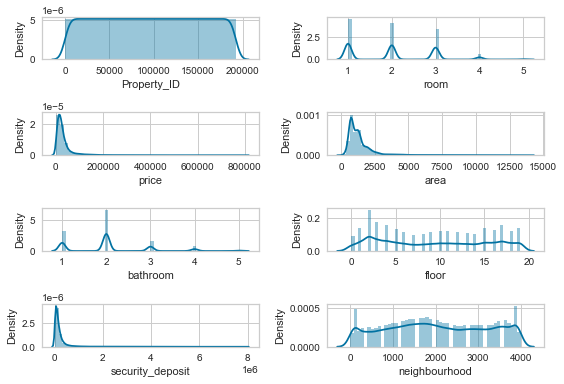

In [67]:
a=4
b=2
c=1
for i in nums.columns:
    plt.subplot(a,b,c)
    sns.distplot(nums.loc[:,i])
    plt.xlabel(i)
    c=c+1

plt.tight_layout()
plt.show()

Security Deposit, Price along with Area appears to be skewed.

We need to look into neighborhood distance.

No of Bathrooms appear to be 2 in most of the cases.

In [68]:
# Categorical Data
cats=combined.select_dtypes(include="object")

In [69]:
cats.columns

Index(['layout_type', 'property_type', 'locality', 'furnish_type', 'city',
       'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift'],
      dtype='object')

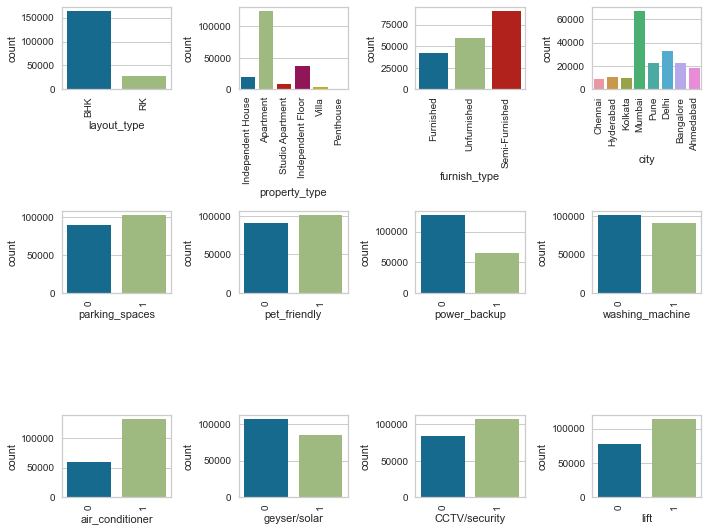

In [70]:
a=4
b=4
c=1
plt.figure(figsize=[10,10])
for i in cats.drop("locality",axis=1).columns:
    plt.subplot(a,b,c)
    sns.countplot(cats.loc[:,i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    c=c+1

plt.tight_layout()
plt.show()

# 1.Most of the Houses are:
### have lift
### have geysers
### have ACs followed by no washing machine
### No Power Backup
### They are pet friendly houses.
### They have parking spaces, in Mumbai mostly and are semi-furnished Apartments

## Bivariate Analysis

In [71]:
nums.columns

Index(['Property_ID', 'room', 'price', 'area', 'bathroom', 'floor',
       'security_deposit', 'neighbourhood'],
      dtype='object')

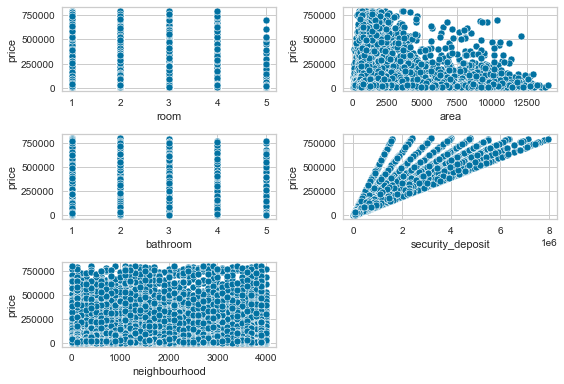

In [72]:
cols=['room','area','bathroom','security_deposit','neighbourhood']
a=3
b=2
c=1
for i in cols:
    plt.subplot(a,b,c)
    sns.scatterplot(combined[i],combined['price'])
    plt.xlabel(i)
    c=c+1

plt.tight_layout()
plt.show()

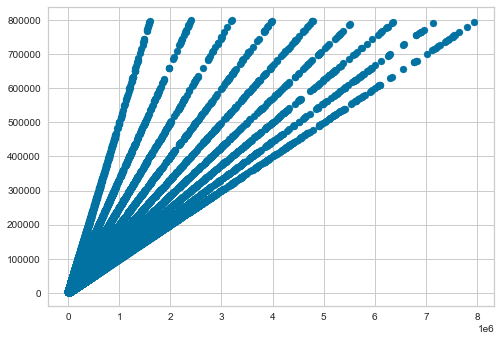

In [73]:
plt.scatter(train.security_deposit,train.price)

In [74]:
# plt.scatter(train.security_deposit,train.price)

In [75]:
combined.corr()

,Property_ID,room,price,area,bathroom,floor,security_deposit,neighbourhood
Property_ID,1.000000,-0.128191,-0.043837,-0.041498,-0.072418,-0.000981,-0.041572,0.041555
room,-0.128191,1.000000,0.054031,0.065974,0.171285,0.039686,0.048852,-0.058604
price,-0.043837,0.054031,1.000000,0.020436,0.041852,0.009306,0.897503,-0.018155
area,-0.041498,0.065974,0.020436,1.000000,0.051163,0.010395,0.020747,-0.008769
bathroom,-0.072418,0.171285,0.041852,0.051163,1.000000,0.039041,0.038587,-0.036691
floor,-0.000981,0.039686,0.009306,0.010395,0.039041,1.000000,0.007952,-0.011015
security_deposit,-0.041572,0.048852,0.897503,0.020747,0.038587,0.007952,1.000000,-0.017883
neighbourhood,0.041555,-0.058604,-0.018155,-0.008769,-0.036691,-0.011015,-0.017883,1.000000


In [76]:
# sns.heatmap(combined)

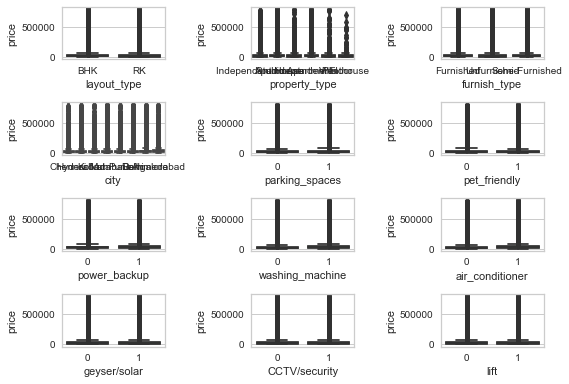

In [77]:
cats=['layout_type', 'property_type', 'furnish_type', 'city',
       'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift']
a=4
b=3
c=1
for i in cats:
    plt.subplot(a,b,c)
    sns.boxplot(combined[i],combined['price'])
    plt.xlabel(i)
    plt.ylabel("price")
    c=c+1

plt.tight_layout()
plt.show()

## Feature Engineering

In [78]:
combined.head(2)

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1600


In [83]:
combined.property_type.unique()

array(['Independent House', 'Apartment', 'Penthouse'], dtype=object)

In [80]:
# Penthouse can go into apartment


In [81]:
combined.replace(to_replace=['Studio Apartment','Independent Floor'],
                value=['Apartment','Apartment'],inplace=True)

In [82]:
combined.replace(to_replace='Villa',
                value='Independent House',inplace=True)

In [84]:
combined.layout_type.unique()

array(['BHK', 'RK'], dtype=object)

In [85]:
combined.locality.unique()

array(['Palavakkam', 'Manikonda', 'Jodhpur Park', ...,
       'Dhanalakshmi Layout', 'Kalyani Nagar Annexe',
       'Neeladri Investment Layout 6th Main Road'], dtype=object)

In [88]:
combined.groupby('locality').mean()['price']

locality
1 Sector Number 3 Road     188557.0
10 Sector Number 3 Road     28970.0
10 Sector Number 6 Road         NaN
100 Feet Road               17570.0
11 Sector Number 6 Road     20495.0
                             ...   
vivekananda Nagar           12998.0
wadebolhai                  11800.0
wakad                       78465.0
worli sea Fase              38462.0
yogi nagar                  27504.0
Name: price, Length: 4140, dtype: float64

In [89]:
# Convert the city into Region
north=['Delhi']
west=['Mumbai','Ahmedabad','Pune']
south=['Chennai','Hyderabad','Bangalore']

In [91]:
def meracity(x):
    if x in north:
        return('North')
    elif x in south:
        return("South")
    elif x in west:
        return("West")
    else:
        return("East")

In [93]:
combined['Region']=combined['city'].apply(meracity)

In [94]:
new=combined.drop(['Property_ID','locality','city'],axis=1)

In [95]:
new.head()

,room,layout_type,property_type,price,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,Region
0,3,BHK,Independent House,33624.0,1312,Furnished,2,1,1,1,0,0,1,0,302616,0,0,300,South
1,1,BHK,Apartment,9655.0,1474,Unfurnished,2,0,17,0,1,0,0,1,19310,0,1,1600,South
2,3,BHK,Apartment,23699.0,1837,Semi-Furnished,2,0,10,1,1,1,1,0,118495,0,1,3100,East
3,1,BHK,Apartment,6306.0,606,Unfurnished,1,0,18,0,0,0,0,0,37836,0,1,300,West
4,1,BHK,Apartment,12008.0,498,Semi-Furnished,3,0,14,0,0,1,1,0,72048,0,1,0,West


In [96]:
new.loc[:,['room','price']].corr()

,room,price
room,1.000000,0.054031
price,0.054031,1.000000


In [100]:
bhk=train.loc[new.layout_type=='BHK','price']
rk=train.loc[new.layout_type=='RK','price']

In [101]:
from scipy.stats import ttest_ind
ttest_ind(bhk,rk)

Ttest_indResult(statistic=7.382484143859903, pvalue=1.5625315383553e-13)

In [102]:
new.corr()

,room,price,area,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
room,1.000000,0.054031,0.065974,0.171285,0.054514,0.039686,-0.041222,0.018150,0.176331,0.203954,0.031678,0.048852,0.001748,0.043793,-0.058604
price,0.054031,1.000000,0.020436,0.041852,0.026572,0.009306,-0.018975,0.020657,0.032285,0.045829,0.018356,0.897503,-0.014748,0.007315,-0.018155
area,0.065974,0.020436,1.000000,0.051163,0.019313,0.010395,-0.025342,-0.004146,0.043953,0.053871,0.008468,0.020747,0.012241,0.010977,-0.008769
bathroom,0.171285,0.041852,0.051163,1.000000,0.044466,0.039041,-0.023710,0.013227,0.117025,0.148859,0.020333,0.038587,0.003016,0.038953,-0.036691
parking_spaces,0.054514,0.026572,0.019313,0.044466,1.000000,0.000328,-0.042685,-0.018787,0.030893,0.043086,0.001656,0.025227,0.012023,-0.001311,-0.017733
floor,0.039686,0.009306,0.010395,0.039041,0.000328,1.000000,0.004762,0.007903,0.033310,0.034598,-0.005725,0.007952,-0.005646,0.855295,-0.011015
pet_friendly,-0.041222,-0.018975,-0.025342,-0.023710,-0.042685,0.004762,1.000000,0.026281,-0.028234,-0.031107,-0.012318,-0.017004,-0.002394,0.002553,-0.009923
power_backup,0.018150,0.020657,-0.004146,0.013227,-0.018787,0.007903,0.026281,1.000000,0.001262,-0.000514,0.037251,0.016715,-0.009307,0.005192,-0.020208
washing_machine,0.176331,0.032285,0.043953,0.117025,0.030893,0.033310,-0.028234,0.001262,1.000000,0.630157,0.011048,0.030732,0.009822,0.040957,-0.032010
air_conditioner,0.203954,0.045829,0.053871,0.148859,0.043086,0.034598,-0.031107,-0.000514,0.630157,1.000000,0.016904,0.043526,0.008674,0.041226,-0.045141


In [103]:
new.room.unique()

array([3, 1, 4, 2, 5], dtype=int64)

In [104]:
new

,room,layout_type,property_type,price,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,Region
0,3,BHK,Independent House,33624.0,1312,Furnished,2,1,1,1,0,0,1,0,302616,0,0,300,South
1,1,BHK,Apartment,9655.0,1474,Unfurnished,2,0,17,0,1,0,0,1,19310,0,1,1600,South
2,3,BHK,Apartment,23699.0,1837,Semi-Furnished,2,0,10,1,1,1,1,0,118495,0,1,3100,East
3,1,BHK,Apartment,6306.0,606,Unfurnished,1,0,18,0,0,0,0,0,37836,0,1,300,West
4,1,BHK,Apartment,12008.0,498,Semi-Furnished,3,0,14,0,0,1,1,0,72048,0,1,0,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,3,BHK,Apartment,NaN,1628,Semi-Furnished,2,1,4,0,0,1,1,0,77049,0,0,2900,West
192401,1,BHK,Apartment,NaN,729,Unfurnished,1,0,3,1,0,0,0,0,29074,1,0,3100,South
192402,3,RK,Apartment,NaN,897,Furnished,3,1,8,1,1,0,1,1,188088,1,1,1100,West
192403,3,BHK,Apartment,NaN,2229,Unfurnished,1,0,0,1,1,0,0,0,103938,0,0,1500,North


In [106]:
new.furnish_type.unique()

array(['Furnished', 'Unfurnished', 'Semi-Furnished'], dtype=object)

In [108]:
pd.DataFrame(new.groupby("property_type")['furnish_type'].value_counts()).T

property_type      Apartment                       Independent House  \
furnish_type  Semi-Furnished Unfurnished Furnished    Semi-Furnished   
furnish_type           80980       50819     37324              9641   

property_type                            Penthouse                        
furnish_type  Unfurnished Furnished Semi-Furnished Unfurnished Furnished  
furnish_type         8011      4922            303         257       148

In [109]:
new.floor.describe()

count    192405.000000
mean          9.163057
std           5.957812
min           0.000000
25%           4.000000
50%           9.000000
75%          15.000000
max          19.000000
Name: floor, dtype: float64

In [110]:
new.columns

Index(['room', 'layout_type', 'property_type', 'price', 'area', 'furnish_type',
       'bathroom', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup',
       'washing_machine', 'air_conditioner', 'geyser/solar',
       'security_deposit', 'CCTV/security', 'lift', 'neighbourhood', 'Region'],
      dtype='object')

In [111]:
new=new.drop(["room",'floor'],axis=1)

In [112]:
new.head()

,layout_type,property_type,price,area,furnish_type,bathroom,parking_spaces,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,Region
0,BHK,Independent House,33624.0,1312,Furnished,2,1,1,0,0,1,0,302616,0,0,300,South
1,BHK,Apartment,9655.0,1474,Unfurnished,2,0,0,1,0,0,1,19310,0,1,1600,South
2,BHK,Apartment,23699.0,1837,Semi-Furnished,2,0,1,1,1,1,0,118495,0,1,3100,East
3,BHK,Apartment,6306.0,606,Unfurnished,1,0,0,0,0,0,0,37836,0,1,300,West
4,BHK,Apartment,12008.0,498,Semi-Furnished,3,0,0,0,1,1,0,72048,0,1,0,West


In [114]:
pd.get_dummies(new,drop_first=True).shape

(192405, 21)

In [ ]:
new.select_dtypes(include)

In [117]:
cols=['price','area','security_deposit','neighbourhood']
df=train.loc[:,cols]

In [118]:
df.head()

,price,area,security_deposit,neighbourhood
0,33624,1312,302616,300
1,9655,1474,19310,1600
2,23699,1837,118495,3100
3,6306,606,37836,300
4,12008,498,72048,0


In [123]:
df.isnull().sum()

price               0
area                0
security_deposit    0
neighbourhood       0
dtype: int64

In [120]:
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram
from yellowbrick.cluster import KElbowVisualizer


In [121]:
model=KMeans(random_state=1)
visuals=KElbowVisualizer(estimator=model,k=(2,10))

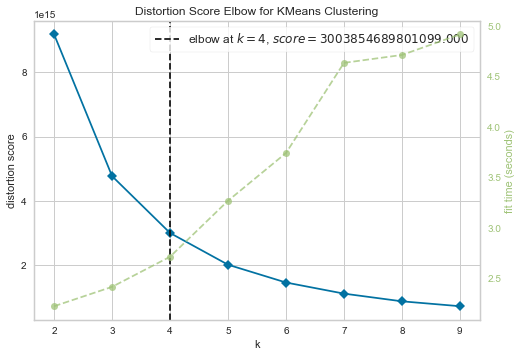

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
visuals.fit(df)
visuals.show()

In [127]:
sc=StandardScaler()
scaled=sc.fit_transform(df)

In [128]:
from sklearn.neighbors import NearestNeighbors
n=NearestNeighbors(n_neighbors=2)
model=n.fit(scaled)
distance,index=model.kneighbors(scaled)

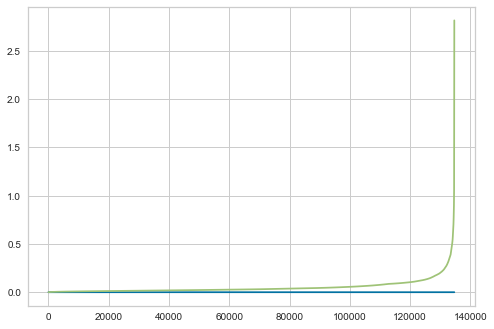

In [129]:
plt.plot(np.sort(distance,axis=0))

In [131]:
# dbscan=DBSCAN(eps=1,min_samples=len(df.columns)+1)
# dbscan.fit(scaled)

In [132]:
# set(dbscan.labels_)

# Model - 
* Decision Tree
* Random Forest
* Gradient Boosting

In [133]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
new.shape

(192405, 17)

In [136]:
train.shape,test.shape

((134683, 21), (57722, 20))

In [137]:
newtrain=new.loc[0:train.shape[0]-1,:]

In [140]:
newtest=new.loc[train.shape[0]:,:]

In [142]:
newtest=newtest.drop('price',axis=1)

In [143]:
newtrain.shape,newtest.shape

((134683, 17), (57722, 16))

In [154]:

dummytrain=pd.get_dummies(newtrain,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [156]:
dummytrain.shape,dummytest.shape

((134683, 21), (57722, 20))

Random Forest Model

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
X=dummytrain.drop('price',axis=1)
y=dummytrain.price
cross_val_score(estimator=rf,X=X,y=y,cv=5,scoring='neg_mean_squared_error')


array([-8.13941988e+08, -7.63744086e+08, -7.50682748e+08, -8.06359585e+08,
       -7.47933548e+08])

In [157]:
# Build a randomforest mode
rf=RandomForestRegressor()
pred_rf=rf.fit(X,y).predict(dummytest)


In [158]:
solution=pd.DataFrame({'price':pred_rf})
solution.to_csv("RF Model.csv",index=False)

In [159]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
pred_gbr=gbr.fit(X,y).predict(dummytest)

solution=pd.DataFrame({'price':pred_gbr})
solution.to_csv("GBR Model.csv",index=False)

In [160]:
!pip install lightgbm

In [161]:
import lightgbm as lgbm

In [162]:
light=lgbm.LGBMRegressor()
pred_light=light.fit(X,y).predict(dummytest)

In [163]:
import xgboost as xgb

In [164]:
xgb_r=xgb.XGBRegressor()
pred_xgb=xgb_r.fit(X,y).predict(dummytest)

In [166]:
predictions=pd.DataFrame(data=[pred_gbr,
                              pred_light,
                              pred_xgb]).T

In [167]:
solution=pd.DataFrame({'price':predictions.mean(axis=1)})
solution.to_csv("FinalSubmission.csv",index=False)